**Isomorfismo de Grafos**

A teoria que identifica se dois grafos têm a mesma estrutura é o isomorfismo de grafos. Se
𝐺
G e
𝐻
H são isomorfos, escrevemos
𝐺
≅
𝐻
G≅H, mesmo que a disposição dos vértices seja diferente.


Para provar que dois grafos são isomorfos, precisamos encontrar funções bijetoras
𝑓
1
f
1
​
  (para vértices) e
𝑓
2
f
2
​
  (para arestas) que preservem as conexões. Se não for possível, eles não têm a mesma estrutura.


Para verificar o isomorfismo, comparamos o número de vértices, arestas e os graus dos vértices. Se tudo bater e for possível criar uma bijeção, os grafos são isomorfos. Se houver diferenças estruturais, não são.


O grafo que não for isomorfo aos outros dois é o que deve ser revisado. Podemos identificar isso analisando propriedades como número de vértices, conexões e padrões de adjacência.

**Fecho Transitivo**

O Fecho Transitivo mostra todas as conexões indiretas possíveis em um grafo. Ele ajuda a resolver problemas como rotas de transporte, acessibilidade em mapas e conexões em redes sociais.

Depois que a matriz de fecho transitivo é gerada, dá para verificar se há caminho entre dois pontos em tempo
𝑂
(
1
)
O(1), apenas olhando a matriz. Mas criar essa matriz pode ser mais custoso.

Para cada grafo, criamos a matriz de fecho transitivo usando o Algoritmo de Warshall, que adiciona conexões indiretas.

O Algoritmo de Warshall tem complexidade
𝑂
(
𝑛
3
)
O(n
3
 ) no tempo e
𝑂
(
𝑛
2
)
O(n
2
 ) no espaço, pois trabalha com uma matriz
𝑛
×
𝑛
n×n.

Programação dinâmica resolve problemas quebrando-os em partes menores e reutilizando cálculos já feitos. O Algoritmo de Warshall usa essa técnica para atualizar a matriz sem repetir cálculos desnecessários.


In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

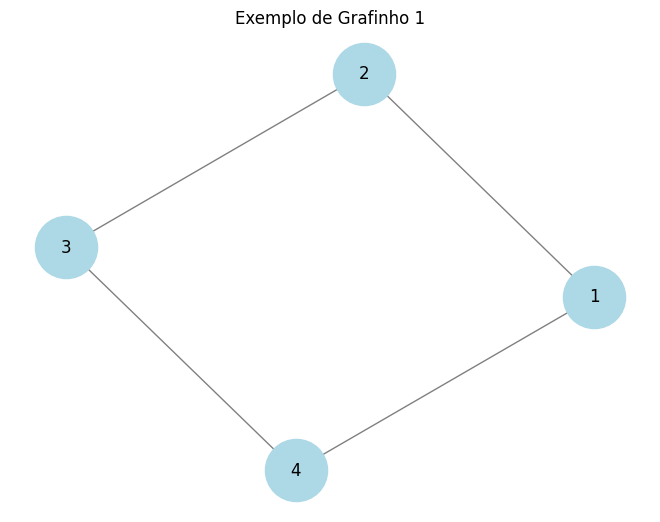

Matrizinha de Fecho Transitivo:
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


In [9]:
#iso?

def verificar_isomorfismo(grafo1, grafo2):
    return nx.is_isomorphic(grafo1, grafo2)

def desenhar_grafo(grafo, titulo="Grafo"):
    plt.figure()
    nx.draw(grafo, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
    plt.title(titulo)
    plt.show()

# transitividade

def fecho_transitivo(matriz_adjacencia):
    n = len(matriz_adjacencia)
    fecho = np.copy(matriz_adjacencia)

    for k in range(n):
        for i in range(n):
            for j in range(n):
                fecho[i][j] = fecho[i][j] or (fecho[i][k] and fecho[k][j])

    return fecho

def algoritmo_warshall(matriz):
    return fecho_transitivo(matriz)


G1 = nx.Graph()
G1.add_edges_from([(1,2), (2,3), (3,4), (4,1)])

desenhar_grafo(G1, "Exemplo de Grafinho 1")


matriz_exemplo = np.array([
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [1, 0, 0, 0]
])

fecho = fecho_transitivo(matriz_exemplo)
print("Matrizinha de Fecho Transitivo:")
print(fecho)
